In [1]:
# Installing the roboticstoolbox package
try:
    from google.colab import output
    print('Running on CoLab')
    output.enable_custom_widget_manager()
    !pip install ipympl
    !pip install roboticstoolbox-python>=1.0.2
    !pip install --no-deps rvc3python
    COLAB = True
except ModuleNotFoundError:
    COLAB = False

Running on CoLab


In [2]:
# ------ standard imports ------ #
import numpy as np
from scipy import optimize
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from spatialmath import *
from spatialmath.base import *
from roboticstoolbox import *
%matplotlib widget
import matplotlib.pyplot as plt

In [3]:
# 2-DOF planar robot
a1 = 1; a2 = 1;
link1 = Link2(ET2.R(), name="link1");
link2 = Link2(ET2.tx(a1) * ET2.R(), name="link2", parent=link1);
link3 = Link2(ET2.tx(a2), name="link3", parent=link2);
robot = ERobot2([link1, link2, link3], name="my robot")

In [4]:
# Forward kinematics (radians)
q = [pi/3, -pi/8] #Angular position
robot1 = models.ETS.Planar2()
print("Homogeneous Transformation Matrix")
robot1.fkine(q)

Homogeneous Transformation Matrix


   0.7934   -0.6088    1.293     
   0.6088    0.7934    1.475     
   0         0         1         


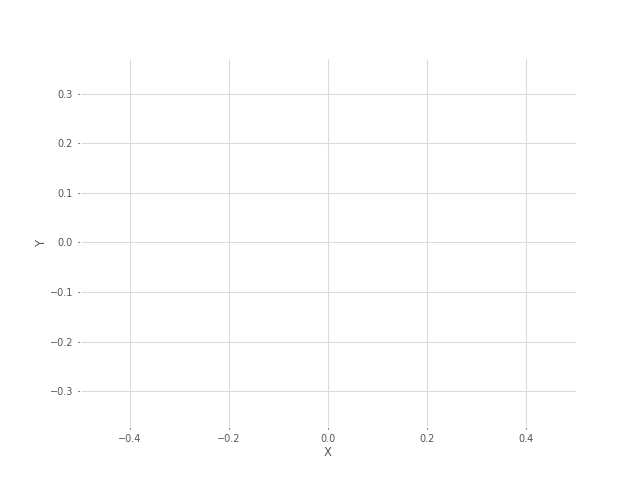

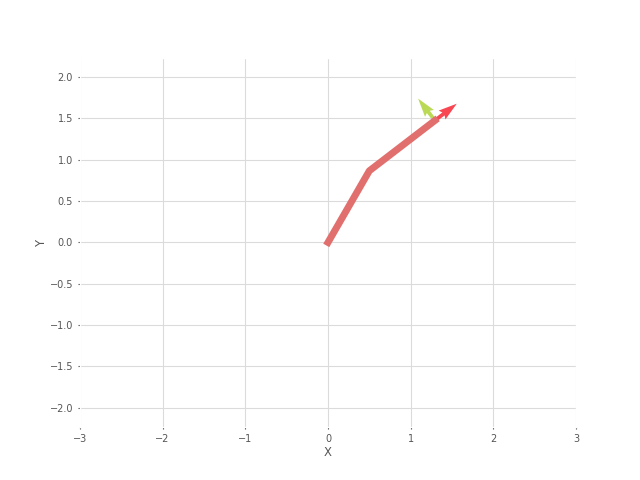

PyPlot2D backend, t = 0, scene:
  robot: None

In [5]:
# 2-D plot
robot.plot(q)

In [6]:
# Forward kinematics (degrees)
q = [30, 40]
q_rad = np.deg2rad(q)
print("Homogeneous Transformation Matrix")
robot.fkine(q_rad)

Homogeneous Transformation Matrix


   0.342    -0.9397    1.208     
   0.9397    0.342     1.44      
   0         0         1         


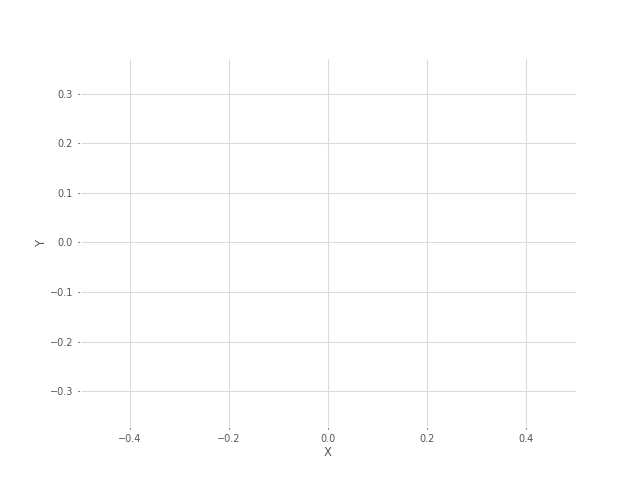

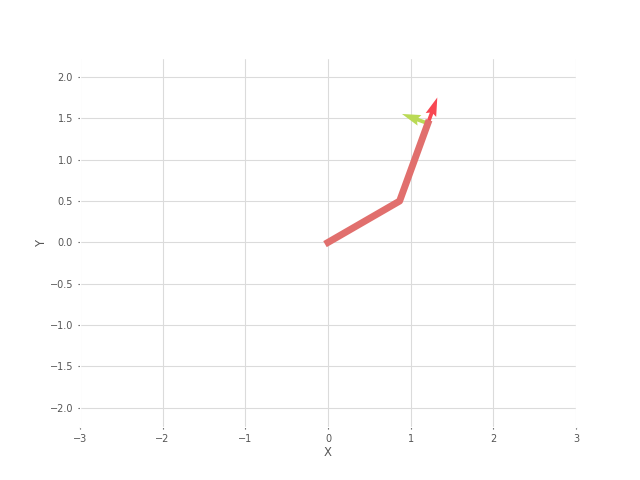

PyPlot2D backend, t = 0, scene:
  robot: None

In [7]:
# 2-D plot
robot.plot(q_rad)

# Panda Robot

https://www.wevolver.com/specs/panda

In [8]:
panda = models.ETS.Panda()
# qr is the angular position by default
print("Default angular position qr")
print(panda.qr)
print("Homogeneous Transformation Matrix")
panda.fkine(panda.qr)

Default angular position qr
[       0     -0.3        0     -2.2        0        2   0.7854]
Homogeneous Transformation Matrix


   0.995     0         0.09983   0.484     
   0        -1         0         0         
   0.09983   0        -0.995     0.413     
   0         0         0         1         


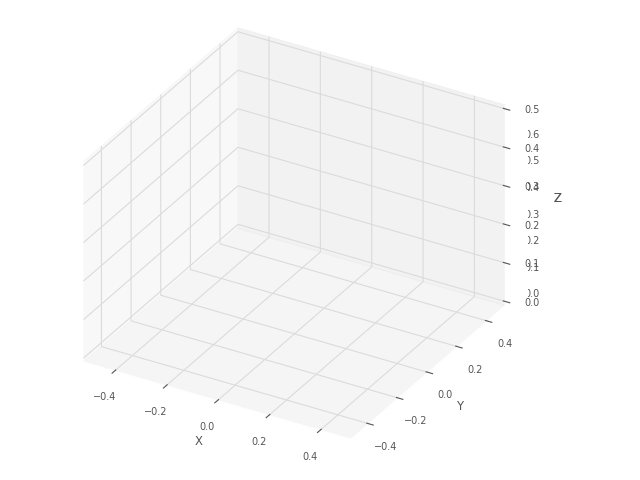

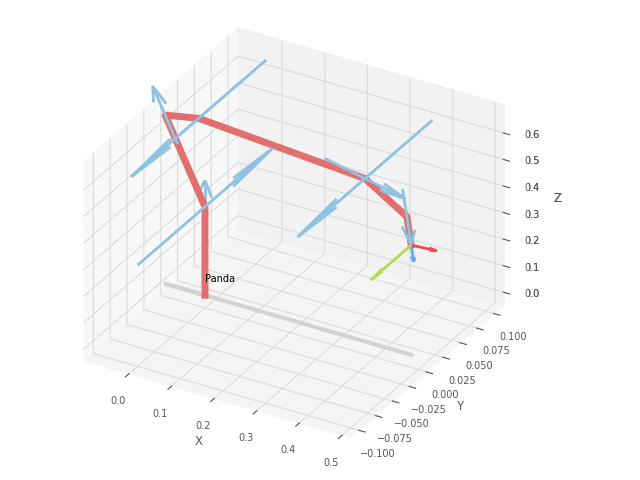

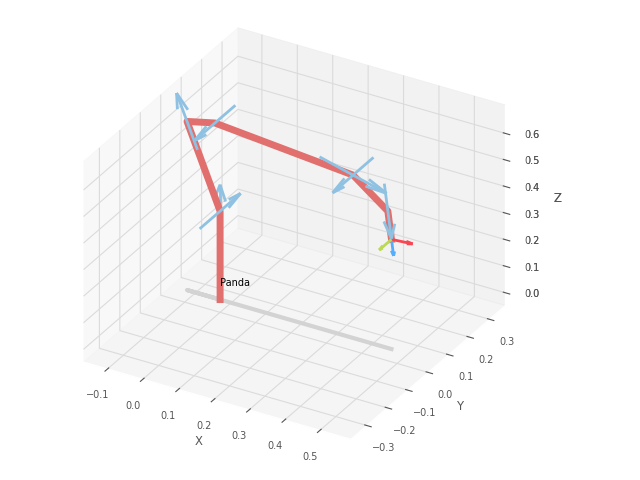

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Panda')

In [10]:
panda.plot(panda.qr)